In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

%matplotlib inline

In [57]:
df = pd.read_csv("HomeC.csv")

C:\Users\ssttg\AppData\Local\Temp\ipykernel_8820\859066504.py:1: DtypeWarning: Columns (0,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("HomeC.csv")


In [58]:
df.head()

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,1451624400,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
1,1451624401,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2,1451624402,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
3,1451624403,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
4,1451624404,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0


In [59]:
df.columns


Index(['time', 'use [kW]', 'gen [kW]', 'House overall [kW]', 'Dishwasher [kW]',
       'Furnace 1 [kW]', 'Furnace 2 [kW]', 'Home office [kW]', 'Fridge [kW]',
       'Wine cellar [kW]', 'Garage door [kW]', 'Kitchen 12 [kW]',
       'Kitchen 14 [kW]', 'Kitchen 38 [kW]', 'Barn [kW]', 'Well [kW]',
       'Microwave [kW]', 'Living room [kW]', 'Solar [kW]', 'temperature',
       'icon', 'humidity', 'visibility', 'summary', 'apparentTemperature',
       'pressure', 'windSpeed', 'cloudCover', 'windBearing', 'precipIntensity',
       'dewPoint', 'precipProbability'],
      dtype='object')

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503911 entries, 0 to 503910
Data columns (total 32 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   time                 503911 non-null  object 
 1   use [kW]             503910 non-null  float64
 2   gen [kW]             503910 non-null  float64
 3   House overall [kW]   503910 non-null  float64
 4   Dishwasher [kW]      503910 non-null  float64
 5   Furnace 1 [kW]       503910 non-null  float64
 6   Furnace 2 [kW]       503910 non-null  float64
 7   Home office [kW]     503910 non-null  float64
 8   Fridge [kW]          503910 non-null  float64
 9   Wine cellar [kW]     503910 non-null  float64
 10  Garage door [kW]     503910 non-null  float64
 11  Kitchen 12 [kW]      503910 non-null  float64
 12  Kitchen 14 [kW]      503910 non-null  float64
 13  Kitchen 38 [kW]      503910 non-null  float64
 14  Barn [kW]            503910 non-null  float64
 15  Well [kW]        

# Data Preprocessing

In [62]:
invalid_time_values = df[~df['time'].apply(lambda x: str(x).isdigit())]['time']
print(invalid_time_values)

503910    \
Name: time, dtype: object


In [63]:
df = df[df['time'].apply(lambda x: str(x).isdigit())]

In [64]:
df['time'] = pd.to_datetime(df['time'].astype(int), unit='s')

In [65]:
df.head()

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,2016-01-01 05:00:00,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
1,2016-01-01 05:00:01,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2,2016-01-01 05:00:02,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
3,2016-01-01 05:00:03,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
4,2016-01-01 05:00:04,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 503910 entries, 0 to 503909
Data columns (total 32 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   time                 503910 non-null  datetime64[ns]
 1   use [kW]             503910 non-null  float64       
 2   gen [kW]             503910 non-null  float64       
 3   House overall [kW]   503910 non-null  float64       
 4   Dishwasher [kW]      503910 non-null  float64       
 5   Furnace 1 [kW]       503910 non-null  float64       
 6   Furnace 2 [kW]       503910 non-null  float64       
 7   Home office [kW]     503910 non-null  float64       
 8   Fridge [kW]          503910 non-null  float64       
 9   Wine cellar [kW]     503910 non-null  float64       
 10  Garage door [kW]     503910 non-null  float64       
 11  Kitchen 12 [kW]      503910 non-null  float64       
 12  Kitchen 14 [kW]      503910 non-null  float64       
 13  Kitchen 38 [kW]    

In [82]:
df['total_energy_use'] = df[columns_to_convert].sum(axis=1)

In [86]:
df['total_energy_use'].head()

0    2.580650
1    2.587100
2    2.582117
3    2.855050
4    3.214750
Name: total_energy_use, dtype: float64

In [88]:
# Calculate net energy (generated - consumed)
df['net_energy'] = df['gen [kW]'] - df['total_energy_use']

In [90]:
df['net_energy'].head()

0   -2.577167
1   -2.583633
2   -2.578650
3   -2.851567
4   -3.211283
Name: net_energy, dtype: float64

In [92]:
# Extract hour, day, and month for time-based analysis
df['hour'] = df['time'].dt.hour
df['day'] = df['time'].dt.day
df['month'] = df['time'].dt.month

In [100]:
# Aggregating total energy use by hour of the day
hourly_usage = df.groupby('hour')['total_energy_use'].mean()
print(hourly_usage.head())

hour
0    2.871463
1    2.368135
2    2.255000
3    2.063936
4    2.227631
Name: total_energy_use, dtype: float64


In [102]:
# Aggregating total energy use by day
daily_usage = df.groupby('day')['total_energy_use'].mean()
print(daily_usage.head())

day
1    3.009557
2    2.404970
3    1.793950
4    2.967529
5    2.388465
Name: total_energy_use, dtype: float64


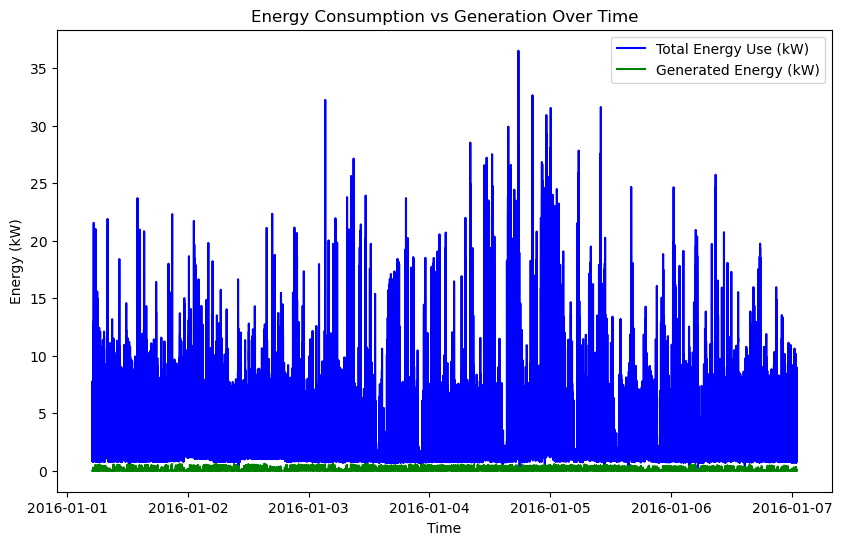

In [106]:
# Energy Consumption Over Time
plt.figure(figsize=(10, 6))
plt.plot(df['time'], df['total_energy_use'], label='Total Energy Use (kW)', color='blue')
plt.plot(df['time'], df['gen [kW]'], label='Generated Energy (kW)', color='green')
plt.xlabel('Time')
plt.ylabel('Energy (kW)')
plt.title('Energy Consumption vs Generation Over Time')
plt.legend()
plt.show()

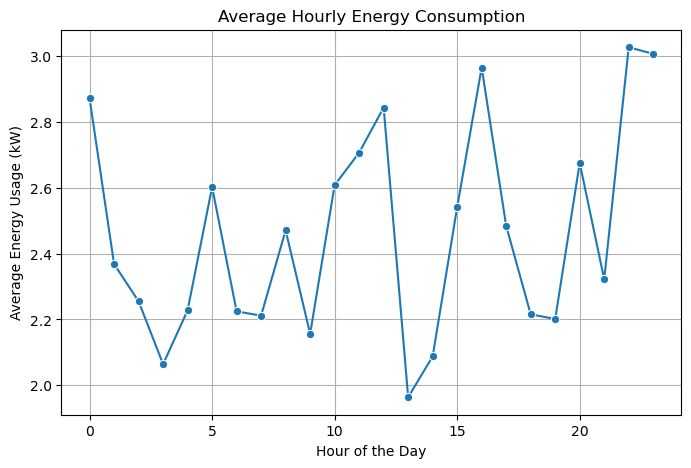

In [108]:
# Plot hourly energy usage
plt.figure(figsize=(8, 5))
sns.lineplot(x=hourly_usage.index, y=hourly_usage.values, marker='o')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Energy Usage (kW)')
plt.title('Average Hourly Energy Consumption')
plt.grid(True)
plt.show()

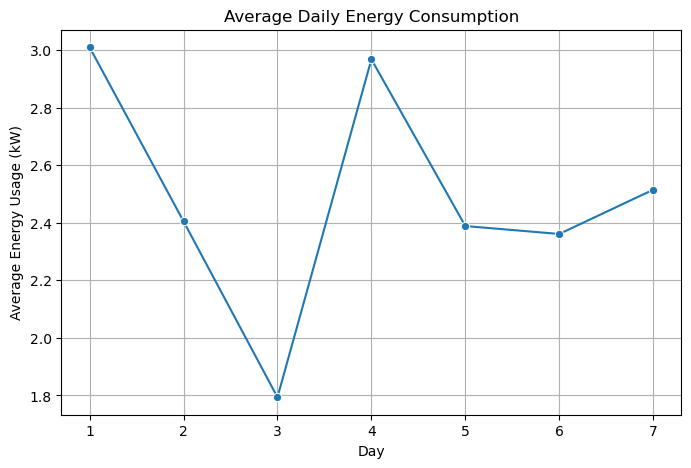

In [110]:
# Plot daily energy usage
plt.figure(figsize=(8, 5))
sns.lineplot(x=daily_usage.index, y=daily_usage.values, marker='o')
plt.xlabel('Day')
plt.ylabel('Average Energy Usage (kW)')
plt.title('Average Daily Energy Consumption')
plt.grid(True)
plt.show()


# ______________________________________________________________________________________________________

In [133]:
# Assume rate of electricity in RS per kWh
rate_per_kwh = 10

In [135]:
df['daily_cost'] = df['total_energy_use'] * rate_per_kwh

In [137]:
# Potential savings by shifting to off-peak times (assuming off-peak times from 22:00 to 6:00)
df['is_off_peak'] = df['hour'].apply(lambda x: 1 if x >= 22 or x <= 6 else 0)

In [139]:
# Calculate potential savings if off-peak usage increases
off_peak_savings = df[df['is_off_peak'] == 1]['total_energy_use'].sum() * rate_per_kwh * 0.2  # 20% off-peak discount
print(f"Potential savings by shifting to off-peak: Rs. {off_peak_savings:.2f}/-")

Potential savings by shifting to off-peak: Rs. 913647.19/-


In [141]:
# Export to CSV
df.to_csv('processed_energy_data.csv', index=False)

# Generate summary reports
summary = df[['total_energy_use', 'net_energy', 'daily_cost']].describe()
print(summary)

       total_energy_use     net_energy     daily_cost
count     503910.000000  503910.000000  503910.000000
mean           2.469115      -2.392885      24.691149
std            2.438387       2.443726      24.383870
min            0.002667     -36.427083       0.026667
25%            1.208800      -2.723463      12.088000
50%            1.689900      -1.616983      16.899000
75%            2.769279      -1.112700      27.692791
max           36.501383      -0.002450     365.013834


In [143]:
df.head()

,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,precipIntensity,dewPoint,precipProbability,total_energy_use,net_energy,hour,day,month,daily_cost,is_off_peak
0,2016-01-01 05:00:00,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,...,0.0,24.4,0.0,2.580650,-2.577167,5,1,1,25.806500,1
1,2016-01-01 05:00:01,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,...,0.0,24.4,0.0,2.587100,-2.583633,5,1,1,25.871000,1
2,2016-01-01 05:00:02,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,...,0.0,24.4,0.0,2.582117,-2.578650,5,1,1,25.821167,1
3,2016-01-01 05:00:03,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,...,0.0,24.4,0.0,2.855050,-2.851567,5,1,1,28.550500,1
4,2016-01-01 05:00:04,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,...,0.0,24.4,0.0,3.214750,-3.211283,5,1,1,32.147500,1


# ____________________________________

# DATA ANALYSIS

# ___________________________________________________________

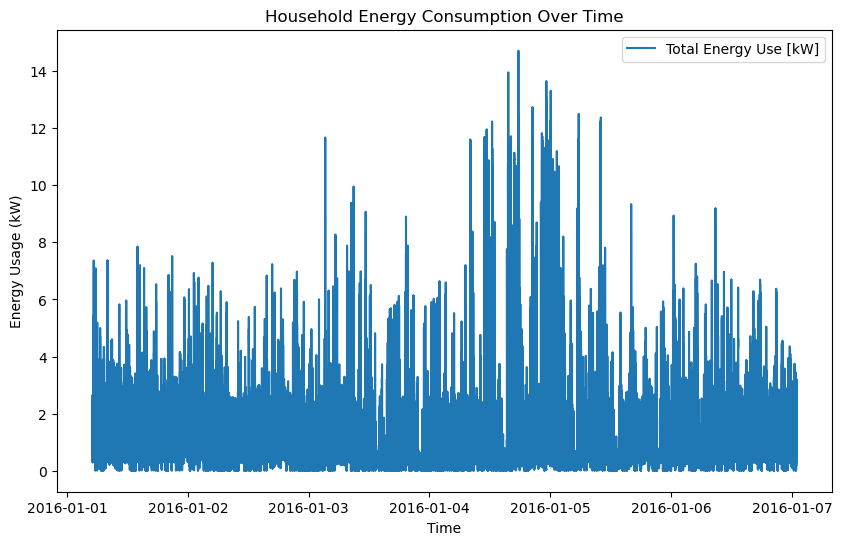

In [150]:
# 1. Time-Series Plot: Energy usage over time for the household
plt.figure(figsize=(10, 6))
plt.plot(df['time'], df['use [kW]'], label='Total Energy Use [kW]')
plt.xlabel('Time')
plt.ylabel('Energy Usage (kW)')
plt.title('Household Energy Consumption Over Time')
plt.legend()
plt.show()

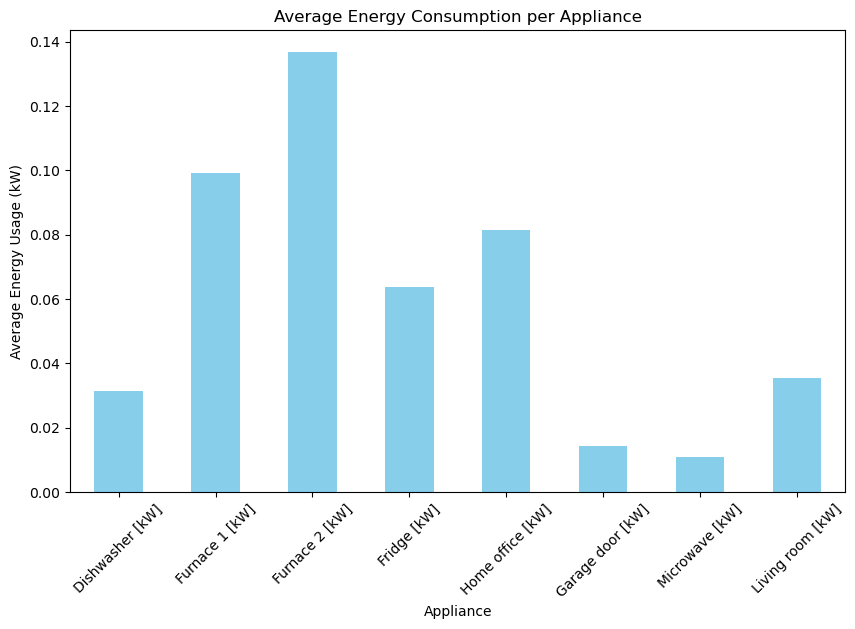

In [152]:
# 2. Comparative Bar Chart: Average energy usage of different appliances
appliances = ['Dishwasher [kW]', 'Furnace 1 [kW]', 'Furnace 2 [kW]', 'Fridge [kW]',
              'Home office [kW]', 'Garage door [kW]', 'Microwave [kW]', 'Living room [kW]']

# Compute the average usage for each appliance
avg_appliance_usage = df[appliances].mean()

plt.figure(figsize=(10, 6))
avg_appliance_usage.plot(kind='bar', color='skyblue')
plt.xlabel('Appliance')
plt.ylabel('Average Energy Usage (kW)')
plt.title('Average Energy Consumption per Appliance')
plt.xticks(rotation=45)
plt.show()

In [156]:
df.columns

Index(['time', 'use [kW]', 'gen [kW]', 'House overall [kW]', 'Dishwasher [kW]',
       'Furnace 1 [kW]', 'Furnace 2 [kW]', 'Home office [kW]', 'Fridge [kW]',
       'Wine cellar [kW]', 'Garage door [kW]', 'Kitchen 12 [kW]',
       'Kitchen 14 [kW]', 'Kitchen 38 [kW]', 'Barn [kW]', 'Well [kW]',
       'Microwave [kW]', 'Living room [kW]', 'Solar [kW]', 'temperature',
       'icon', 'humidity', 'visibility', 'summary', 'apparentTemperature',
       'pressure', 'windSpeed', 'cloudCover', 'windBearing', 'precipIntensity',
       'dewPoint', 'precipProbability', 'total_energy_use', 'net_energy',
       'hour', 'day', 'month', 'daily_cost', 'is_off_peak'],
      dtype='object')

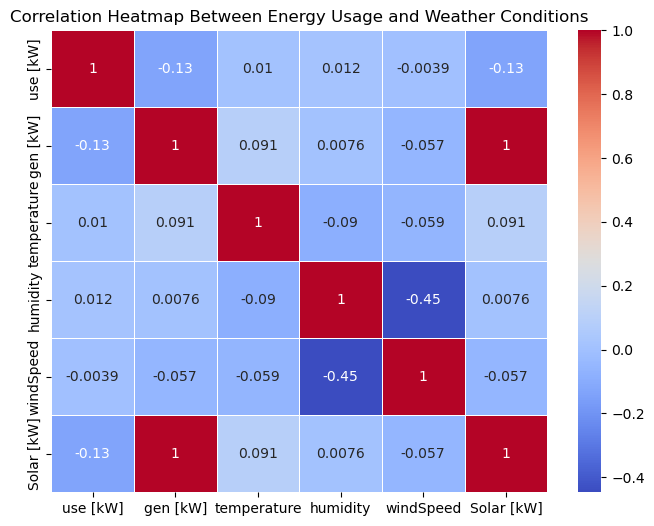

In [158]:
# 3. Heatmap: Correlation between different features (e.g., energy, weather)
correlation_features = ['use [kW]', 'gen [kW]', 'temperature', 'humidity', 'windSpeed', 'Solar [kW]']
correlation_matrix = df[correlation_features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap Between Energy Usage and Weather Conditions')
plt.show()


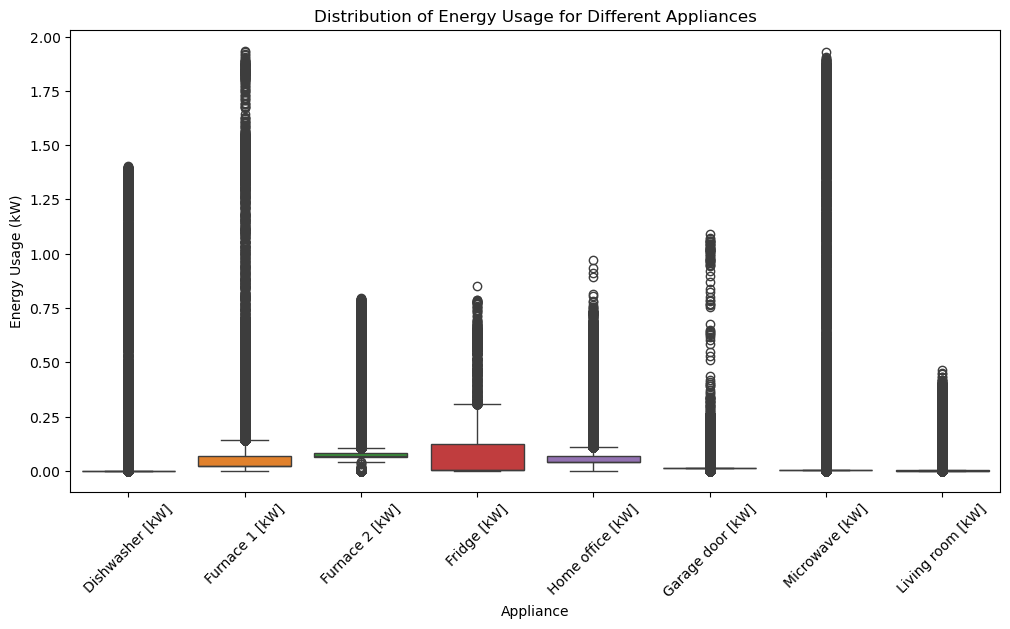

In [160]:
# 4. Box Plot: Distribution of energy usage for each appliance
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[appliances])
plt.xlabel('Appliance')
plt.ylabel('Energy Usage (kW)')
plt.title('Distribution of Energy Usage for Different Appliances')
plt.xticks(rotation=45)
plt.show()

In [173]:
# Function to calculate costs and potential savings
def energy_report(df, rate_per_kwh):
    # Calculate total energy usage in kWh (sum of all usage)
    total_energy_kwh = df['use [kW]'].sum()  # Total energy usage in kW
    total_cost = total_energy_kwh * rate_per_kwh  # Total cost in Rs

    # Calculate appliance-wise energy consumption and cost
    appliances = ['Dishwasher [kW]', 'Furnace 1 [kW]', 'Furnace 2 [kW]', 'Fridge [kW]',
                  'Microwave [kW]', 'Living room [kW]']

    appliance_energy = df[appliances].sum()
    appliance_cost = appliance_energy * rate_per_kwh

    # Generate Report
    print(f"Total Energy Consumption: {total_energy_kwh:.2f} kWh")
    print(f"Total Energy Cost: Rs.{total_cost:.2f}/-")
    print("\nEnergy Consumption and Cost per Appliance:")
    for appliance, energy, cost in zip(appliances, appliance_energy, appliance_cost):
        print(f"{appliance}: {energy:.2f} kWh, Cost: Rs.{cost:.2f}/-")

    # Potential savings (e.g., by using more solar power)
    solar_generated = df['Solar [kW]'].sum()
    potential_savings = solar_generated * rate_per_kwh
    print(f"\nSolar Energy Generated: {solar_generated:.2f} kWh")
    print(f"Potential Savings by Maximizing Solar Use: Rs.{potential_savings:.2f}/-")

# Run the energy report function
rate_per_kwh = float(input("Enter Rate per Kwh in ur area (in Rs):"))
energy_report(df,rate_per_kwh)


Enter Rate per Kwh in ur area (in Rs): 10


Total Energy Consumption: 432839.74 kWh
Total Energy Cost: Rs.4328397.40/-

Energy Consumption and Cost per Appliance:
Dishwasher [kW]: 15806.41 kWh, Cost: Rs.158064.10/-
Furnace 1 [kW]: 49993.06 kWh, Cost: Rs.499930.62/-
Furnace 2 [kW]: 68924.40 kWh, Cost: Rs.689243.96/-
Fridge [kW]: 32026.71 kWh, Cost: Rs.320267.11/-
Microwave [kW]: 5534.44 kWh, Cost: Rs.55344.40/-
Living room [kW]: 17794.48 kWh, Cost: Rs.177944.77/-

Solar Energy Generated: 38412.76 kWh
Potential Savings by Maximizing Solar Use: Rs.384127.65/-
